# Ejercicios clase 1: Resolución de la XOR aplicando Stochastic Gradient Descent
La _disyunción exclusiva_ es un operador lógico representado como XOR. La tabla de verdad de este operador es la siguiente:

| A | B | A - B |
|---|---|-------|
| V | V | F     |
| V | F | V     |
| F | V | V     |
| F | F | F     |

El modelo predictor resuelve un problema de regresión lineal para predecir XOR de la siguiente forma,

$$ \hat{y}_i = x_{i,1}w_1 + x_{I,2}w_2 + b $$
siendo $i$ una muestra del dataset

### Modelo de red neuronal
El objetivo será obtener los coeficientes $w$ y $b$. Para ello se plantea una red neuronal de dos layers y tres neuronas, distribuidas bajo el siguiente esquema:
- Layer 1: 2 neuronas.
- Layer 2: 1 neurona.
Cada neurona posee una función lineal que toma los datos de entrada,

$$ z_{i,j}^{(l)} = x_{i,1}w_{j,1}^{(l)} + x_{I,2}w_{j,2}^{(l)} + b_{j}^{(l)} \qquad j: número \, de \, neurona \quad l: número \, de \, layer $$

Y una función de activación, que en este caso será la sigmoidea,

$$ a_{i,j}^{(l)} = \sigma \left(z_{i,j}^{(l)} \right) = \frac{1}{1 + e^{-z_{i,j}^{(l)}}}  $$

Bajo este esquema, la cantidad de parámetros desconocidos se define como,

$ p_d = o(m+1) $
donde:
- $o$: cantidad de neuronas. para este caso será $o=3$.
- $m$: cantidad de features. En el problema de XOR $m=2$.  

Por lo tanto serán nueve los parámetros desconocidos. 

Como se trata de un caso de regresión lineal, la última neurona no cuenta con función de activación. Su $z$ correspondiente será la predicción para la muestra procesada. 

Este proceso se denomina _forward_ y se repite para cada muestra del dataset.

### Backpropagation
En cada iteración se recalculan los parámetros desconocidos de la forma,

$$ W = W - \alpha\frac{dL}{dW} $$

Donde:
- $W$: vector de mx1 que contiene todos los parámetros.
- $\alpha$: learning rate.

Se define además a la función de pérdida (_Loss Function_) como,

$$ L_i = (y_i - \hat{y_i})^2 $$

Por lo que se calculan las derivadas parciales de $L_i$ respecto de cada parámetro desconocido. En total serán nueve derivadas parciales a resolver. 

### Hiperparámetros
Los hiperparámetros son aquellos elementos que hacen al diseño del modelo. En este son:
- La cantidad de layers.
- La cantidad de neuronas por layers.
- El valor de $\alpha$.

### Stochastic Gradient Descent
Debe definirse al vector $W$ previo a iniciar las iteraciones. En este caso será mediante valores random. 

A continuación se comienza con la resolución del problema

### Referencias
$$ i: muestra(fila) \, del \, dataset \qquad j: número \, de \, neurona \quad l: número \, de \, layer $$

### Predicción con los parámetros desconocidos
$$ \hat{y}_i = x_{i,1}^2w_1 + x_{I,2}w_2 + w_3$$

### Función z de cada neurona: es el polinomio 
$$ z_{i,j}^{(l)} = x_{i,1}^2w_{j,1}^{(l)} + x_{i,2}w_{j,2}^{(l)} + w_{j,3}^{(l)} $$

### Última neurona: no tiene función de activación por ser un caso de regresión
$$ z_{i,1}^{(l)} = \hat{y}_i $$

## Librerías necesarias

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Dataset sintético
rng = np.random.default_rng(3219)
X_train = rng.integers(low=0, high=2, size=(4,2), dtype=np.int8)
y_train = np.logical_xor(X_train[:,0], X_train[:,1]).astype(int) #mx1
print('Dataset X: \n', X_train)
print('Objetivo (label) y: \n', y_train)

Dataset X: 
 [[1 0]
 [0 0]
 [1 0]
 [1 1]]
Objetivo (label) y: 
 [1 0 1 0]


## Funciones utilizadas
Función sigmoidea

In [3]:
#Función sigmoid
def sigmoid(x):                                        
    return 1 / (1 + np.exp(-x))

En el proceso de backpropagation se necesita la derivada de la función sigmoidea, que puede escribirse como,

$$ a_{i,j}^{(l)'} = \sigma \left(z_{i,j}^{(l)} \right) \left[1 - \sigma \left(z_{i,j}^{(l)} \right) \right] $$

In [4]:
#Función derivada sigmoid
def der_sigmoid(x):                                        
    return sigmoid(x)*(1-sigmoid(x))

El error cuadrático medio (_mean square error_),

$$ MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y})^2 $$

In [5]:
def mse(y_label, y_pred,samples):
    return np.sum((y_label - y_pred) ** 2) / samples

In [6]:
def sdg(X,y,W,O,alpha,epochs):
    '''
    X: dataset de entrenamiento.
    y: label u objetivo.
    W: valores iniciales de los parámetros desconicidos.
    O: cantidad total de neuronas.
    epochs: cantidad de iteraciones de entrenamiento
    '''
    
    #Dimensiones X nxm
    n = X.shape[0]
    m = X.shape[1]
    
    #Se agrega una columna de 1 a X para los parámetros b
    X_expand = np.hstack((X, np.ones(X.shape[0], dtype=np.int8).reshape(-1,1)))
    
    #Se construye un tensor de W a partir de la cantidad de neuronas
    W_tensor = W.reshape(O,m+1,1) 
    
    #Inicialización del acumulador del cálculo del error cuádratico medio
    MSE = []
    
    for j in range(epochs):
        #Inicialización del acumulador de la predicción por cada muestra
        y_pred = []
        for i in range(n):
            #-----------
            #Forward
            #Layer 1
            z_l1 = X_expand[i]@W_tensor[0:2,:,:]
            a_l1 = sigmoid(z_l1)

            #Layer 2
            #Se agrega una fila de 1 a a_l1
            a_l1_exp = np.vstack((a_l1, np.ones(a_l1.shape[1], dtype=np.int8).reshape(-1,1)))
            z_l2 = np.transpose(a_l1_exp)@W_tensor[2,:,:]
            y_pred.append(z_l2[0,0])

            #---------------
            #Backpropagation
            Err = y[i] - y_pred[i]

            #Layer 2
            #Neurona 1
            dLdW_2_1 = -2*Err*a_l1_exp

            #Layer 1
            #Neurona 1
            dLdW_1_1 = -2*Err*W_tensor[2,0,:]*der_sigmoid(z_l1[0])*X_expand[i].reshape(m+1,1)
            #Neurona 2
            dLdW_1_2 = -2*Err*W_tensor[2,1,:]*der_sigmoid(z_l1[1])*X_expand[i].reshape(m+1,1)

            dLdW = np.array([dLdW_1_1, dLdW_1_2, dLdW_2_1])
            W_tensor = W_tensor - alpha*dLdW
        MSE.append(mse(y,y_pred,n))
    return MSE, W_tensor

## Resultados
Se realiza una evaluación tomando diferentes valores de $\alpha$, graficando la convergencia a partir de los cálculos de MSE. 

Text(0, 0.5, 'MSE')

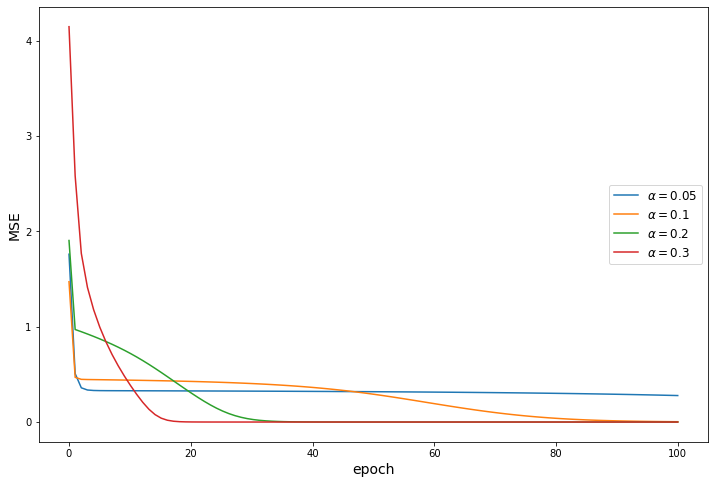

In [7]:
#Parámetros desconocidos
#Cantidad de nueronas
O = 3
m = X_train.shape[1]
#Cantidad de parámetros desconocidos. distribución random normal
np.random.seed(5) 
W = np.random.randn(O*(m+1)).reshape(-1,1) #mx1

alpha_l = [0.05, 0.1, 0.2, 0.3]
epochs = 100
#Se acumulan los parámetros obtenidos para cada valor de alpha
W_tensor_train = []

eje_x = np.linspace(0,epochs,epochs)
ax = plt.figure(figsize=(12,8))

for k in range(len(alpha_l)):
    alpha = alpha_l[k]
    MSE, W_tensor = sdg(X_train,y_train,W,O,alpha,epochs)
    W_tensor_train.append(W_tensor)
    plt.plot(eje_x,MSE, label=r'$\alpha=${}'.format(alpha))
    plt.legend( fontsize=12, loc='center right')
plt.xlabel('epoch', fontsize=14)
plt.ylabel('MSE', fontsize=14)

De los resultados obtenidos pueden concluirse que,
- Se requiere un valor bajo de _epoch_ para que el modelo converja.
- El mejor resultado de convergencia se obtuvo para $\alpha=0.2$.

## Prueba
Se pone a prueba los parámetros obtenidos en el entrenamiento. Primero se define la función _forward_ que calcula $\hat{y}$ a partir de,
- Un dataset de testeo.
- El tensor $W$ obtenido durante el entrenamiento.

In [8]:
def forward(X,W_tensor):
    n = X.shape[0]
    #Se agrega una columna de 1 a X_train
    X_expand = np.hstack((X, np.ones(X.shape[0], dtype=np.int8).reshape(-1,1)))
    y_pred = []
    for i in range(n):
        #Layer 1
        z_l1 = X_expand[i]@W_tensor[0:2,:,:]
        a_l1 = sigmoid(z_l1)

        #Layer 2
        #Se agrega una fila de 1 a a_l1
        a_l1_exp = np.vstack((a_l1, np.ones(a_l1.shape[1], dtype=np.int8).reshape(-1,1)))
        z_l2 = np.transpose(a_l1_exp)@W_tensor[2,:,:]
        y_pred.append(z_l2[0,0])
    return y_pred

Se toman los valores de $W$ para $\alpha=0.2$

In [9]:
W_tensor_train_02 = W_tensor_train[2]

Se generan 4 dataset distintos con sus respectivos _label_ para evaluar la predicción. Para ello se calcula el MSE

In [10]:
seeds = [38, 50, 61, 100]
MSE_test = []

for i in range(len(seeds)):
    rng = np.random.default_rng(i)
    X_test = rng.integers(low=0, high=2, size=(4,2), dtype=np.int8)
    y_test = np.logical_xor(X_train[:,0], X_train[:,1]).astype(int) #mx1
    y_pred_test = forward(X_test,W_tensor_train_02)
    MSE_test.append(mse(y_test, y_pred_test, 4))

Se imprime el MSE para cada dataset de test

In [11]:
#Visualización de resultados
MSE_test

[0.9569002143275228,
 0.5837531103384296,
 0.5837576541132257,
 0.4999954982432523]

### Conclusión
Los resultados obtenidos al testear los parámetros desconocidos, no fueron buenos respecto al MSE alcanzado durante el entrenamiento. Da cuenta de que presenta un sesgo grande. 